In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
#from sklearn.ensemble import GradientBoostingRegressor as GBR
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'folium'

In [3]:
raw_data=pd.read_csv("data/exam_data.csv")

In [4]:
raw_data.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-07 16:20:30,2016-02-07 16:25:32,1,0.70,-73.982292,40.768974,1,N,...,5.0,0.0,0.5,1.15,0.00,0.3,6.95,False,False,False
1,2,1,2016-02-19 20:51:07,2016-02-19 21:28:32,1,8.80,-73.864166,40.770058,1,N,...,33.5,0.5,0.5,7.00,5.54,0.3,47.34,True,True,False
2,3,2,2016-02-19 20:52:36,2016-02-19 21:28:59,6,19.26,-73.781998,40.644669,1,N,...,53.5,0.5,0.5,0.00,0.00,0.3,54.80,False,True,True
3,4,1,2016-02-19 20:54:24,2016-02-19 21:04:21,1,0.70,-73.982056,40.740215,1,N,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,False,True,True
4,5,2,2016-02-19 20:55:47,2016-02-19 21:01:12,2,0.46,-73.990967,40.734089,1,N,...,5.0,0.5,0.5,1.00,0.00,0.3,7.30,False,True,False
5,6,2,2016-02-19 20:56:03,2016-02-19 21:03:02,1,1.12,-73.982803,40.755821,1,N,...,6.5,0.5,0.5,0.00,0.00,0.3,7.80,False,True,True
6,7,2,2016-02-19 20:56:45,2016-02-19 21:03:35,2,0.97,-73.958939,40.780762,1,N,...,6.5,0.5,0.5,1.17,0.00,0.3,8.97,False,True,False
7,8,1,2016-02-19 20:57:07,2016-02-19 21:21:04,1,5.00,-73.991638,40.750259,1,N,...,19.5,0.5,0.5,3.00,5.54,0.3,29.34,True,True,False
8,9,1,2016-02-19 20:58:48,2016-02-19 21:03:30,1,1.30,-73.971024,40.764084,1,N,...,6.0,0.5,0.5,1.46,0.00,0.3,8.76,False,True,False
9,10,2,2016-02-19 20:59:18,2016-02-19 21:07:28,5,1.15,-73.997719,40.720989,1,N,...,7.0,0.5,0.5,1.66,0.00,0.3,9.96,False,True,False


In [5]:
raw_data.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

In [6]:
df = raw_data.drop(raw_data.columns[[0]], axis=1) 

In [7]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-07 16:20:30,2016-02-07 16:25:32,1,0.70,-73.982292,40.768974,1,N,-73.973701,...,5.0,0.0,0.5,1.15,0.00,0.3,6.95,False,False,False
1,1,2016-02-19 20:51:07,2016-02-19 21:28:32,1,8.80,-73.864166,40.770058,1,N,-73.952034,...,33.5,0.5,0.5,7.00,5.54,0.3,47.34,True,True,False
2,2,2016-02-19 20:52:36,2016-02-19 21:28:59,6,19.26,-73.781998,40.644669,1,N,-73.977654,...,53.5,0.5,0.5,0.00,0.00,0.3,54.80,False,True,True
3,1,2016-02-19 20:54:24,2016-02-19 21:04:21,1,0.70,-73.982056,40.740215,1,N,-73.987534,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,False,True,True
4,2,2016-02-19 20:55:47,2016-02-19 21:01:12,2,0.46,-73.990967,40.734089,1,N,-73.986542,...,5.0,0.5,0.5,1.00,0.00,0.3,7.30,False,True,False
5,2,2016-02-19 20:56:03,2016-02-19 21:03:02,1,1.12,-73.982803,40.755821,1,N,-73.991325,...,6.5,0.5,0.5,0.00,0.00,0.3,7.80,False,True,True
6,2,2016-02-19 20:56:45,2016-02-19 21:03:35,2,0.97,-73.958939,40.780762,1,N,-73.945534,...,6.5,0.5,0.5,1.17,0.00,0.3,8.97,False,True,False
7,1,2016-02-19 20:57:07,2016-02-19 21:21:04,1,5.00,-73.991638,40.750259,1,N,-73.955513,...,19.5,0.5,0.5,3.00,5.54,0.3,29.34,True,True,False
8,1,2016-02-19 20:58:48,2016-02-19 21:03:30,1,1.30,-73.971024,40.764084,1,N,-73.957283,...,6.0,0.5,0.5,1.46,0.00,0.3,8.76,False,True,False
9,2,2016-02-19 20:59:18,2016-02-19 21:07:28,5,1.15,-73.997719,40.720989,1,N,-73.999161,...,7.0,0.5,0.5,1.66,0.00,0.3,9.96,False,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               28454 non-null  int64  
 1   tpep_pickup_datetime   28454 non-null  object 
 2   tpep_dropoff_datetime  28454 non-null  object 
 3   passenger_count        28454 non-null  int64  
 4   trip_distance          28454 non-null  float64
 5   pickup_longitude       28454 non-null  float64
 6   pickup_latitude        28454 non-null  float64
 7   RatecodeID             28454 non-null  int64  
 8   store_and_fwd_flag     28454 non-null  object 
 9   dropoff_longitude      28454 non-null  float64
 10  dropoff_latitude       28454 non-null  float64
 11  payment_type           28454 non-null  int64  
 12  fare_amount            28454 non-null  float64
 13  extra                  28454 non-null  float64
 14  mta_tax                28454 non-null  float64
 15  ti

In [9]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,1.527061,1.641492,2.830239,-72.829545,40.119641,1.035285,-72.865533,40.140239,1.331201,12.346235,0.328688,0.497136,1.763209,0.280064,0.299631,15.514963
std,0.499276,1.293418,3.616985,9.142567,5.034007,0.278481,8.998636,4.954860,0.486227,11.721551,0.436922,0.040866,2.540054,1.351279,0.014334,13.992979
min,1.000000,1.000000,0.000000,-121.933220,0.000000,1.000000,-121.933342,0.000000,1.000000,-93.000000,-1.000000,-0.500000,-2.700000,0.000000,-0.300000,-93.300000
25%,1.000000,1.000000,1.000000,-73.991608,40.736386,1.000000,-73.991302,40.734540,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.660000,-73.981567,40.753605,1.000000,-73.979576,40.753632,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,2.000000,2.000000,3.070000,-73.966593,40.767979,1.000000,-73.962364,40.769409,2.000000,14.000000,0.500000,0.500000,2.335000,0.000000,0.300000,17.160000
max,2.000000,6.000000,182.200000,0.000000,40.934280,5.000000,0.000000,41.034912,4.000000,780.000000,4.500000,0.500000,149.700000,22.500000,0.300000,780.300000


In [10]:
df = df[((df['fare_amount']>-93) & df['tip_amount'] >-2.7)]

In [11]:

df.nunique()

VendorID                     2
tpep_pickup_datetime     28242
tpep_dropoff_datetime    28253
passenger_count              6
trip_distance             1568
pickup_longitude          9240
pickup_latitude          15406
RatecodeID                   5
store_and_fwd_flag           2
dropoff_longitude        10299
dropoff_latitude         16709
payment_type                 4
fare_amount                186
extra                        7
mta_tax                      3
tip_amount                 692
tolls_amount                35
improvement_surcharge        3
total_amount              1289
GoodTip                      2
Extra                        2
Cash                         2
dtype: int64

Text(0.5, 1.0, 'Distribution of Tip amount')

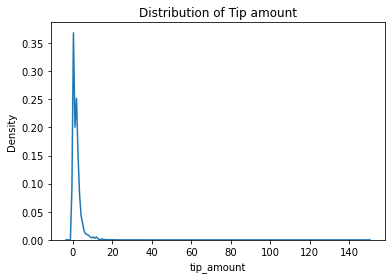

In [12]:
sns.kdeplot(df['tip_amount']).set_title("Distribution of Tip amount")

<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

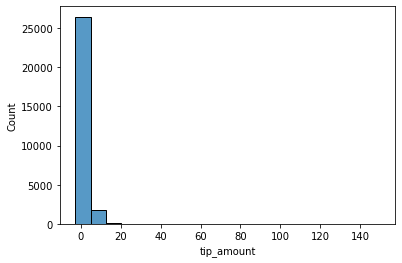

In [13]:
sns.histplot(df['tip_amount'],kde=False,bins=20)

#plt.figure(figsize=(8,5))
#sns.kdeplot(df['tip_amount']).set_title("Distribution of Tip amount")

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

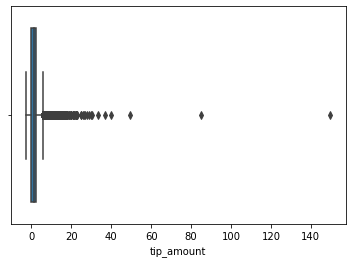

In [14]:
sns.boxplot(df['tip_amount'])

In [15]:
df['tip_amount'].sort_values(ascending=False)

22042    149.70
17466     85.00
24886     49.62
14073     40.00
13139     37.00
          ...  
9650       0.00
9647       0.00
9645       0.00
9643       0.00
18414     -2.70
Name: tip_amount, Length: 28454, dtype: float64

# count of 0 in tip amount

In [16]:
df['tip_amount'].value_counts()[0]

9971

In [17]:
df.drop(df[df['tip_amount'] == -2.7].index, inplace = True)

In [18]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000
mean,1.527045,1.641514,2.830338,-72.832105,40.121051,1.035286,-72.868094,40.141650,1.331143,12.346757,0.328700,0.497171,1.763366,0.280073,0.299652,15.515719
std,0.499277,1.293435,3.617009,9.132526,5.028473,0.278486,8.988419,4.949229,0.486135,11.721427,0.436925,0.040437,2.539961,1.351301,0.013887,13.992643
min,1.000000,1.000000,0.000000,-121.933220,0.000000,1.000000,-121.933342,0.000000,1.000000,-93.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-93.300000
25%,1.000000,1.000000,1.000000,-73.991608,40.736389,1.000000,-73.991302,40.734543,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.660000,-73.981567,40.753609,1.000000,-73.979576,40.753632,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,2.000000,2.000000,3.070000,-73.966599,40.767979,1.000000,-73.962364,40.769409,2.000000,14.000000,0.500000,0.500000,2.340000,0.000000,0.300000,17.160000
max,2.000000,6.000000,182.200000,0.000000,40.934280,5.000000,0.000000,41.034912,4.000000,780.000000,4.500000,0.500000,149.700000,22.500000,0.300000,780.300000


<ipython-input-19-5c2e8b85fd4a>:4: RuntimeWarning: divide by zero encountered in log
  sns.kdeplot(np.log(df['tip_amount'].values)).set_title("Distribution of tip amount (log scale)")
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of tip amount (log scale)')

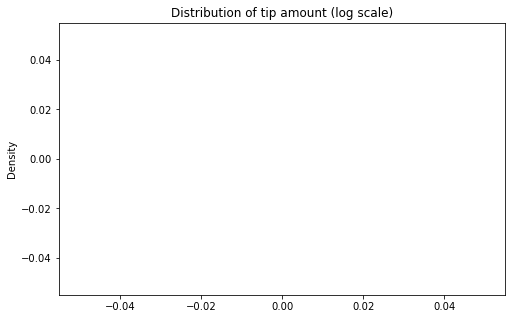

In [19]:
#sns.histplot(df['tip_amount'],kde=False,bins=20)
#plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['tip_amount'].values)).set_title("Distribution of tip amount (log scale)")

<AxesSubplot:xlabel='VendorID', ylabel='count'>

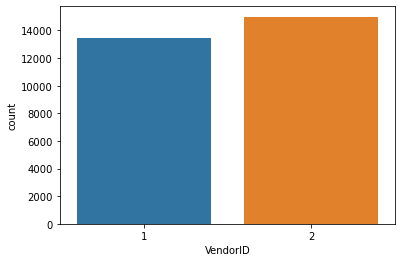

In [20]:
sns.countplot(x='VendorID',data=df)

<AxesSubplot:xlabel='RatecodeID', ylabel='count'>

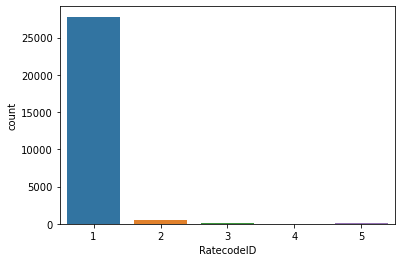

In [21]:
sns.countplot(x='RatecodeID',data=df)

In [22]:
df.passenger_count.value_counts()

1    20335
2     4150
5     1418
3     1091
6      936
4      523
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

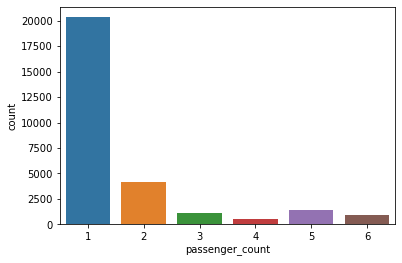

In [23]:
sns.countplot(x='passenger_count',data=df)

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

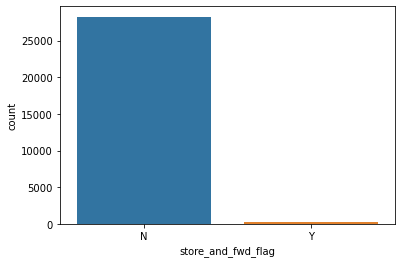

In [24]:
sns.countplot(x='store_and_fwd_flag',data=df)

In [25]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.992725
Y    0.007275
Name: store_and_fwd_flag, dtype: float64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

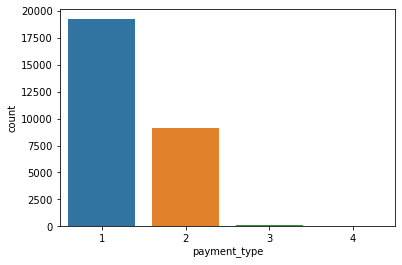

In [26]:
sns.countplot(x='payment_type',data=df)

In [27]:
print("Longitude Boundary in data")
min(df.pickup_longitude.min(), df.pickup_longitude.min()),max(df.pickup_longitude.max(), df.pickup_longitude.max())

Longitude Boundary in data


(-121.933219909668, 0.0)

In [28]:
print("Latitude Boundary in data")
min(df.pickup_latitude.min(), df.pickup_latitude.min()),max(df.pickup_latitude.max(), df.pickup_latitude.max())

Latitude Boundary in data


(0.0, 40.9342803955078)

In [29]:
print("Longitude Boundary in data")
min(df.dropoff_longitude.min(), df.dropoff_longitude.min()),max(df.dropoff_longitude.max(), df.dropoff_longitude.max())



Longitude Boundary in data


(-121.93334197998, 0.0)

In [30]:
print("Latitude Boundary in data")
min(df.dropoff_latitude.min(), df.dropoff_latitude.min()),max(df.dropoff_latitude.max(), df.dropoff_latitude.max())

Latitude Boundary in data


(0.0, 41.034912109375)

# removing 0s in longitute and latitude

In [31]:
nonzero_mean = df[ df.pickup_longitude != 0 ].mean()
nonzero_mean = df[ df.pickup_latitude != 0 ].mean()


In [32]:
df.loc[ df.pickup_longitude == 0, "pickup_longitude" ] = nonzero_mean['pickup_longitude']
df.loc[ df.pickup_latitude == 0, "pickup_latitude" ] = nonzero_mean['pickup_latitude']

(37.3893966674805, 40.9342803955078)

<Figure size 1440x3600 with 0 Axes>

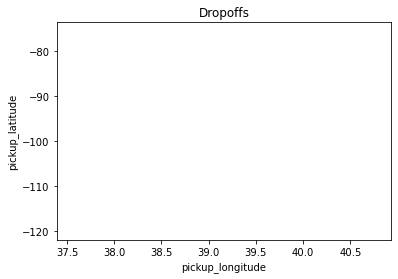

In [33]:
plt.figure(figsize=(20,50))
city_long_border = (-121.933219909668, -73.57177734375)
city_lat_border = (37.3893966674805, 40.9342803955078)
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_long_border)
plt.xlim(city_lat_border)

(0.0, 41.034912109375)

<Figure size 1440x3600 with 0 Axes>

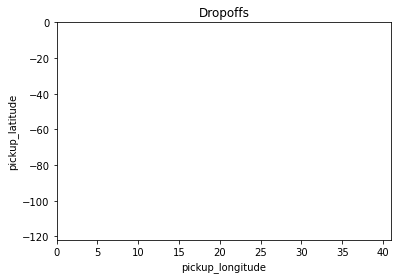

In [34]:
plt.figure(figsize=(20,50))
city_long_border = (-121.93334197998, 0.0)
city_lat_border = (0.0, 41.034912109375)
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_long_border)
plt.xlim(city_lat_border)

In [35]:
df['trip_distance'].value_counts()
#df['trip_distance'].value_counts()[0] 

0.90     677
1.00     663
0.70     623
0.80     621
1.10     619
        ... 
14.04      1
17.46      1
11.67      1
13.25      1
34.13      1
Name: trip_distance, Length: 1568, dtype: int64

In [36]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [37]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

df['pickup_day_no']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['tpep_dropoff_datetime'].dt.weekday

df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

df['pickup_min']=df['tpep_pickup_datetime'].dt.minute
df['dropoff_min']=df['tpep_dropoff_datetime'].dt.minute

df['pickup_min']=df['tpep_pickup_datetime'].dt.second
df['dropoff_min']=df['tpep_dropoff_datetime'].dt.second

df['pickup_month']=df['tpep_pickup_datetime'].dt.month
df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month

In [38]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [39]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

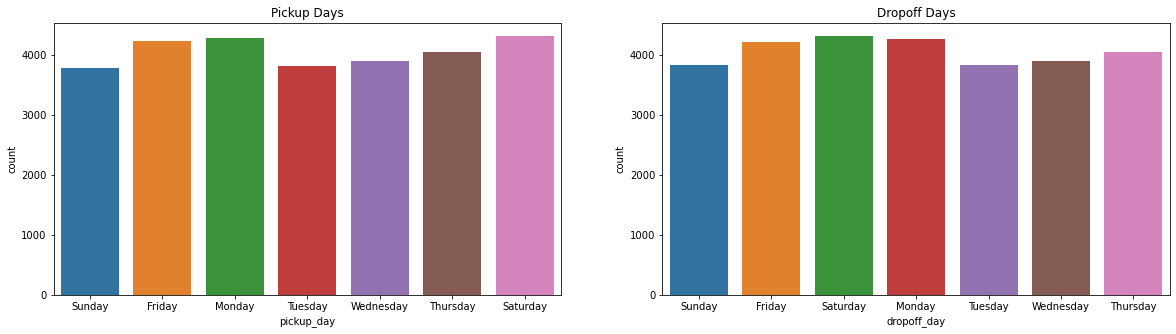

In [40]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

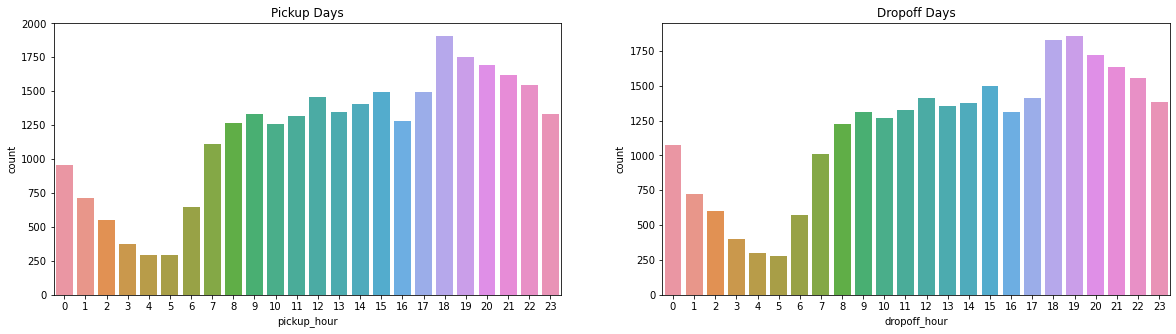

In [41]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

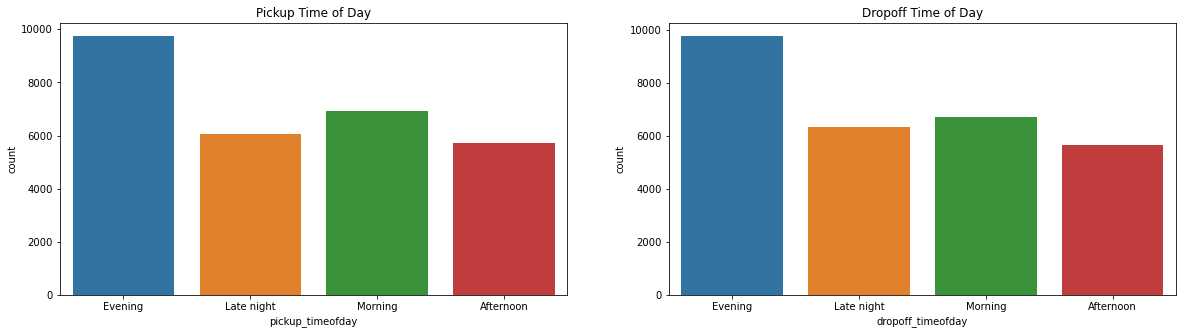

In [42]:


figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

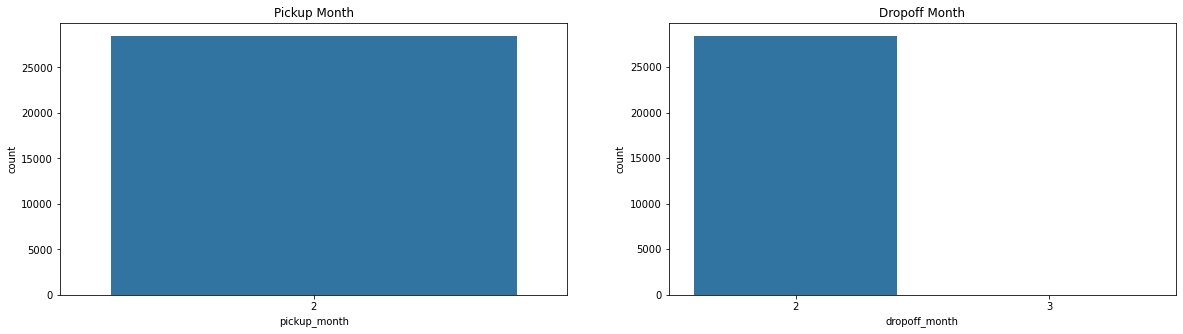

In [43]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28453 entries, 0 to 28453
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               28453 non-null  int64         
 1   tpep_pickup_datetime   28453 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  28453 non-null  datetime64[ns]
 3   passenger_count        28453 non-null  int64         
 4   trip_distance          28453 non-null  float64       
 5   pickup_longitude       28453 non-null  float64       
 6   pickup_latitude        28453 non-null  float64       
 7   RatecodeID             28453 non-null  int64         
 8   store_and_fwd_flag     28453 non-null  object        
 9   dropoff_longitude      28453 non-null  float64       
 10  dropoff_latitude       28453 non-null  float64       
 11  payment_type           28453 non-null  int64         
 12  fare_amount            28453 non-null  float64       
 13  e

In [45]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,improvement_surcharge,total_amount,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_min,dropoff_min,pickup_month,dropoff_month
count,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,...,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.000000,28453.0,28453.000000
mean,1.527045,1.641514,2.830338,-73.976078,40.751232,1.035286,-72.868094,40.141650,1.331143,12.346757,...,0.299652,15.515719,2.993779,2.999473,13.695884,13.689453,29.513724,29.411837,2.0,2.000281
std,0.499277,1.293435,3.617009,0.286554,0.033604,0.278486,8.988419,4.949229,0.486135,11.721427,...,0.013887,13.992643,1.997907,1.999253,6.326149,6.411670,17.287254,17.272522,0.0,0.016766
min,1.000000,1.000000,0.000000,-121.933220,37.389397,1.000000,-121.933342,0.000000,1.000000,-93.000000,...,-0.300000,-93.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,2.000000
25%,1.000000,1.000000,1.000000,-73.991608,40.737820,1.000000,-73.991302,40.734543,1.000000,6.500000,...,0.300000,8.300000,1.000000,1.000000,9.000000,9.000000,15.000000,14.000000,2.0,2.000000
50%,2.000000,1.000000,1.660000,-73.981567,40.753609,1.000000,-73.979576,40.753632,1.000000,9.000000,...,0.300000,11.750000,3.000000,3.000000,14.000000,14.000000,29.000000,29.000000,2.0,2.000000
75%,2.000000,2.000000,3.070000,-73.967911,40.767979,1.000000,-73.962364,40.769409,2.000000,14.000000,...,0.300000,17.160000,5.000000,5.000000,19.000000,19.000000,45.000000,44.000000,2.0,2.000000
max,2.000000,6.000000,182.200000,-73.571777,40.934280,5.000000,0.000000,41.034912,4.000000,780.000000,...,0.300000,780.300000,6.000000,6.000000,23.000000,23.000000,59.000000,59.000000,2.0,3.000000


In [46]:
# Dropping the null values.
df = df.dropna()

Text(0, 0.5, 'Numbers')

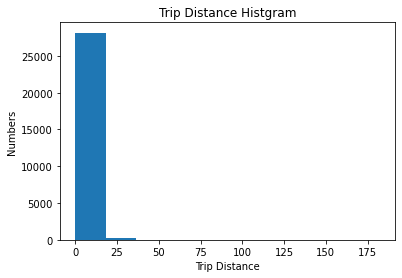

In [47]:
trip_dis=df['trip_distance']
plt.hist(trip_dis)
plt.title("Trip Distance Histgram")
plt.xlabel("Trip Distance")
plt.ylabel("Numbers")

In [48]:
T_pick=pd.to_datetime(df['tpep_pickup_datetime'])
T_drop=pd.to_datetime(df['tpep_dropoff_datetime'])
T_delta=T_drop-T_pick
# Split out the Hour .
hour_pick=pd.DatetimeIndex(T_pick).hour #hour of pick up
hour_drop=pd.DatetimeIndex(T_drop).hour #hour of drop off
# Test if these two are the same
hour_pick ==hour_drop #it's hard to tell if every single element is the samle
(hour_pick ==hour_drop).all() #False.

False

In [49]:
df['hour_pick']=hour_pick
df['hour_drop']=hour_drop
#mean and median trip distance grouped by hour-pick'''
mean_pick=df.groupby('hour_pick', as_index=False)['trip_distance'].mean()
median_pick=df.groupby('hour_pick', as_index=False)['trip_distance'].median()
# mean and median trip distance grouped by hour-drop'''
mean_drop=df.groupby('hour_drop', as_index=False)['trip_distance'].mean()
median_drop=df.groupby('hour_drop', as_index=False)['trip_distance'].median()

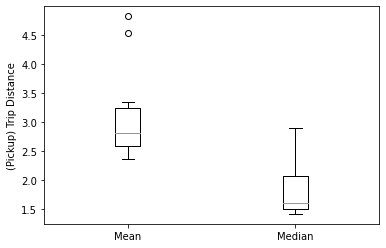

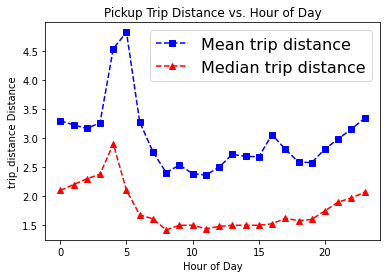

In [50]:
m1=[mean_pick['trip_distance'],median_pick['trip_distance']]
plt.boxplot(m1)
plt.xticks([1, 2],['Mean', 'Median'])
plt.ylabel('(Pickup) Trip Distance')
#Plot the mean and median
plt.figure(3)
plt.plot(mean_pick['hour_pick'],mean_pick['trip_distance'],'bs--', label='Mean trip distance')
plt.plot(median_pick['hour_pick'],median_pick['trip_distance'], 'r^--', label='Median trip distance')
plt.title("Pickup Trip Distance vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("trip_distance Distance")
plt.legend(loc='best',fontsize=16)

In [51]:
m2=[mean_drop['Trip_distance'],median_drop['Trip_distance']]
plt.boxplot(m)
plt.xticks([1, 2],['Mean', 'Median'])
plt.ylabel('(Drop-off) Trip Distance')
#Plot the mean and median for drop-off hour
plt.figure(4)
plt.plot(mean_drop['hour_drop'],mean_drop['Trip_distance'],'bs--', label='Mean trip distance')
plt.plot(median_drop['hour_drop'],median_drop['Trip_distance'], 'r^--', label='Median trip distance')
plt.title("Drop-off Trip Distance vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("(Drop-off)Trip Distance")
plt.legend(loc='best',fontsize=16)

KeyError: 'Trip_distance'

In [ ]:
outlier_locations = df[((df.pickup_longitude <= -74.15) | (df.pickup_latitude <= 40.5774)| \
(df.pickup_longitude >= -73.7004) | (df.pickup_latitude >= 40.9176))]

In [ ]:
len(outlier_locations)

448

In [ ]:
map_osm = folium.Map(location=[40.734695, -73.990372] )
sample_locations = outlier_locations
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
#map_osm

NameError: name 'folium' is not defined

## model building

In [2]:
features = ['trip_distance','fare_amount','total_amount']
for variable in features:
   dummies = pd.get_dummies(data[features], prefix =variable)
   df1 = pd.concat([data,dummies],axis=1)
   df1.drop([variable],axis=1, inplace=True)

tip = df1[['tip_amount']]

df2 = df1.drop(['tip_amount'], axis=1)

NameError: name 'data' is not defined

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
print("RMSE for test: %.2f" %lr.score(X_test, y_test))

In [ ]:
DT = DecisionTreeRegressor(random_state= 0)
DT.fit (X_train, y_train)
y_test_pred = DT.predict(X_test)
print("RMSE for test: %.2f" %DT.score(X_test, y_test))

In [ ]:
rf = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=10)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
print("RMSE for test: %.2f" %rf.score(X_test, y_test))

In [ ]:
gbr= GBR(loss='ls', learning_rate=0.1, n_estimators=10, subsample=0.5,max_depth=5, verbose=1)
gbr.fit(X_train,y_train)
y_test_pred=gbr.predict(X_test)

In [ ]:
print("RMSE for test: %.2f" %gbr.score(X_test, y_test))

In [ ]:
df2=df[['total_amount','fare_amount','tip_amount','trip_distance','pickup_longitude']]

In [ ]:
x=df1.drop(['tip_amount'], axis=1)
y = df['tip_amount']